<a href="https://colab.research.google.com/github/wksmirnowa/machinelearning_homeworks/blob/master/HW06_nn_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение в нейронные сети 

## Подготовка к работе с данными

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
from string import punctuation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
quora = pd.read_csv('/content/drive/My Drive/quora.csv')

In [0]:
quora.head(10)

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
5,00004f9a462a357c33be,"Is Gaza slowly becoming Auschwitz, Dachau or T...",0
6,00005059a06ee19e11ad,Why does Quora automatically ban conservative ...,0
7,0000559f875832745e2e,Is it crazy if I wash or wipe my groceries off...,0
8,00005bd3426b2d0c8305,"Is there such a thing as dressing moderately, ...",0
9,00006e6928c5df60eacb,Is it just me or have you ever been in this ph...,0


In [0]:
def preprocess(text):
    tokens = text.lower().split()
    tokens = [token.strip(punctuation) for token in tokens]
    return tokens

In [0]:
vocab = Counter()

for text in quora.question_text:
    vocab.update(preprocess(text))

In [0]:
filtered_vocab = set()

for word in vocab:
    if vocab[word] > 20:
        filtered_vocab.add(word)

In [0]:
len(filtered_vocab)

23324

In [0]:
word2id = {'UNK':1, 'PAD':0}

for word in filtered_vocab:
    word2id[word] = len(word2id)

In [0]:
id2word = {i:word for word, i in word2id.items()}

In [0]:
X = []

for text in quora.question_text:
    tokens = preprocess(text)
    ids = [word2id.get(token, 1) for token in tokens]
    X.append(ids)

In [0]:
MAX_LEN = max(len(x) for x in X)

In [0]:
MAX_LEN

134

In [0]:
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=MAX_LEN)

In [0]:
X.shape

(1306122, 134)

In [0]:
y = quora.target.values

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.05, random_state=42)

## Задание 1.

### а) Конкатенация эмбедингов в один большой эмбединг


In [0]:
inputs = tf.keras.layers.Input(shape=(MAX_LEN,))

embeddings = tf.keras.layers.Embedding(input_dim=len(word2id), output_dim=100)(inputs)
flat = tf.keras.layers.Flatten()(embeddings)
dense = tf.keras.layers.Dense(65, activation='relu')(flat)
dense = tf.keras.layers.Dense(65, activation='relu')(flat)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [0]:
%%time
model.fit(X_train, y_train, 
          validation_data=(X_valid, y_valid),
          batch_size=150,
         epochs=10)

Epoch 1/10
8273/8273 [==============================] - 445s 54ms/step - loss: 0.1347 - accuracy: 0.9491 - val_loss: 0.1126 - val_accuracy: 0.9550
Epoch 2/10
8273/8273 [==============================] - 442s 53ms/step - loss: 0.1098 - accuracy: 0.9555 - val_loss: 0.1103 - val_accuracy: 0.9558
Epoch 3/10
8273/8273 [==============================] - 445s 54ms/step - loss: 0.1043 - accuracy: 0.9575 - val_loss: 0.1137 - val_accuracy: 0.9562
Epoch 4/10
8273/8273 [==============================] - 454s 55ms/step - loss: 0.0995 - accuracy: 0.9595 - val_loss: 0.1128 - val_accuracy: 0.9553
Epoch 5/10
8273/8273 [==============================] - 439s 53ms/step - loss: 0.0940 - accuracy: 0.9617 - val_loss: 0.1153 - val_accuracy: 0.9545
Epoch 6/10
8273/8273 [==============================] - 435s 53ms/step - loss: 0.0875 - accuracy: 0.9648 - val_loss: 0.1188 - val_accuracy: 0.9548
Epoch 7/10
8273/8273 [==============================] - 430s 52ms/step - loss: 0.0802 - accuracy: 0.9683 - val_loss: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


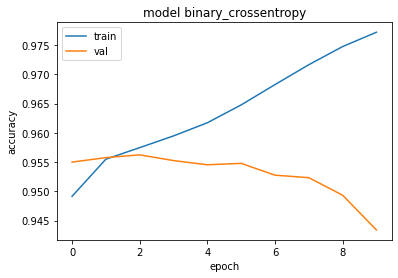

In [0]:
print(model.history.history.keys())
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model binary_crossentropy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
preds = model.predict(X_valid).reshape(-1)

In [0]:
print(classification_report(y_valid, (preds > 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     61365
           1       0.53      0.60      0.56      3942

    accuracy                           0.94     65307
   macro avg       0.75      0.78      0.77     65307
weighted avg       0.95      0.94      0.95     65307



### б) Усреднение эмбедингов

In [0]:
inputs = tf.keras.layers.Input(shape=(MAX_LEN,))

embeddings = tf.keras.layers.Embedding(input_dim=len(word2id), output_dim=100)(inputs)
mean = tf.keras.layers.Lambda(lambda x: tf.keras.backend.mean(x,  axis=1))(embeddings)
dense = tf.keras.layers.Dense(64, activation='relu')(mean)
dense = tf.keras.layers.Dense(64, activation='relu')(mean)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
%%time
model.fit(X_train, y_train, 
          validation_data=(X_valid, y_valid),
          batch_size=130,
         epochs=10)

Epoch 1/10
9545/9545 [==============================] - 254s 27ms/step - loss: 0.2013 - accuracy: 0.9400 - val_loss: 0.1437 - val_accuracy: 0.9471
Epoch 2/10
9545/9545 [==============================] - 260s 27ms/step - loss: 0.1369 - accuracy: 0.9483 - val_loss: 0.1254 - val_accuracy: 0.9522
Epoch 3/10
9545/9545 [==============================] - 262s 27ms/step - loss: 0.1237 - accuracy: 0.9515 - val_loss: 0.1182 - val_accuracy: 0.9537
Epoch 4/10
9545/9545 [==============================] - 261s 27ms/step - loss: 0.1177 - accuracy: 0.9533 - val_loss: 0.1155 - val_accuracy: 0.9543
Epoch 5/10
9545/9545 [==============================] - 274s 29ms/step - loss: 0.1144 - accuracy: 0.9542 - val_loss: 0.1138 - val_accuracy: 0.9548
Epoch 6/10
9545/9545 [==============================] - 277s 29ms/step - loss: 0.1123 - accuracy: 0.9549 - val_loss: 0.1132 - val_accuracy: 0.9553
Epoch 7/10
9545/9545 [==============================] - 276s 29ms/step - loss: 0.1108 - accuracy: 0.9554 - val_loss: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


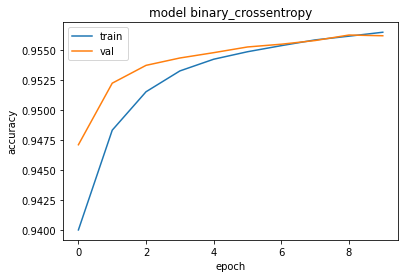

In [0]:
print(model.history.history.keys())
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model binary_crossentropy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
preds = model.predict(X_valid).reshape(-1)

In [0]:
print(classification_report(y_valid, (preds > 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     61365
           1       0.66      0.56      0.61      3942

    accuracy                           0.96     65307
   macro avg       0.82      0.77      0.79     65307
weighted avg       0.95      0.96      0.95     65307



### в) Складывание эмбедингов

In [0]:
inputs = tf.keras.layers.Input(shape=(MAX_LEN,))

embeddings = tf.keras.layers.Embedding(input_dim=len(word2id), output_dim=100)(inputs)
summ = tf.keras.layers.Lambda(lambda x: tf.keras.backend.sum(x,  axis=1))(embeddings)
dense = tf.keras.layers.Dense(64, activation='relu')(summ)
dense = tf.keras.layers.Dense(64, activation='relu')(summ)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
%%time
model.fit(X_train, y_train, 
          validation_data=(X_valid, y_valid),
          batch_size=150,
         epochs=10)

Epoch 1/10
8273/8273 [==============================] - 229s 28ms/step - loss: 0.1349 - accuracy: 0.9492 - val_loss: 0.1165 - val_accuracy: 0.9548
Epoch 2/10
8273/8273 [==============================] - 227s 27ms/step - loss: 0.1144 - accuracy: 0.9548 - val_loss: 0.1136 - val_accuracy: 0.9556
Epoch 3/10
8273/8273 [==============================] - 224s 27ms/step - loss: 0.1102 - accuracy: 0.9563 - val_loss: 0.1138 - val_accuracy: 0.9563
Epoch 4/10
8273/8273 [==============================] - 228s 28ms/step - loss: 0.1076 - accuracy: 0.9573 - val_loss: 0.1137 - val_accuracy: 0.9556
Epoch 5/10
8273/8273 [==============================] - 232s 28ms/step - loss: 0.1055 - accuracy: 0.9581 - val_loss: 0.1134 - val_accuracy: 0.9557
Epoch 6/10
8273/8273 [==============================] - 237s 29ms/step - loss: 0.1036 - accuracy: 0.9590 - val_loss: 0.1209 - val_accuracy: 0.9534
Epoch 7/10
8273/8273 [==============================] - 236s 29ms/step - loss: 0.1014 - accuracy: 0.9598 - val_loss: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


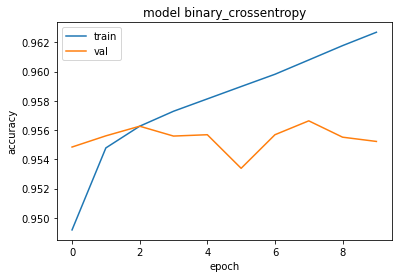

In [0]:
print(model.history.history.keys())
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model binary_crossentropy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
preds = model.predict(X_valid).reshape(-1)

In [0]:
print(classification_report(y_valid, (preds > 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     61365
           1       0.70      0.44      0.55      3942

    accuracy                           0.96     65307
   macro avg       0.83      0.72      0.76     65307
weighted avg       0.95      0.96      0.95     65307



Если судить по графикам, то лучше всего справилось усреднение эмбедингов – там график выглядит адекватнее всего, валидация не падает. По метрикам усредненение эмбедингов тоже, кажется, справилось лучше всего. Попробуем применить разные параметры и посмотреть, сможем ли мы за счет них улучшить метрики для конкатенации и складывания эмбедингов.

In [0]:
#конкатенация: пробуем применить regularizers, сделать разные юниты у Dense и увеличить число слоев

inputs = tf.keras.layers.Input(shape=(MAX_LEN,))

embeddings = tf.keras.layers.Embedding(input_dim=len(word2id), output_dim=100, \
                                       embeddings_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01), \
                                       activity_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01))(inputs)
flat = tf.keras.layers.Flatten()(embeddings)
dense = tf.keras.layers.Dense(100, activation='relu', activity_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01))(flat)
dense = tf.keras.layers.Dense(70, activation='relu', activity_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01))(flat)
dense = tf.keras.layers.Dense(40, activation='relu', activity_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01))(flat)
outputs = tf.keras.layers.Dense(1, activation='sigmoid', activity_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01))(dense)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [47]:
%%time
model.fit(X_train, y_train, 
          validation_data=(X_valid, y_valid),
          batch_size=300, #размер батча побольше, чтобы модель побыстрее отработала
         epochs=10)

Epoch 1/10


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


4137/4137 [==============================] - 454s 110ms/step - loss: 25.1725 - accuracy: 0.9380 - val_loss: 0.5648 - val_accuracy: 0.9396
Epoch 2/10
4137/4137 [==============================] - 454s 110ms/step - loss: 0.5372 - accuracy: 0.9381 - val_loss: 0.5119 - val_accuracy: 0.9399
Epoch 3/10
4137/4137 [==============================] - 458s 111ms/step - loss: 0.5007 - accuracy: 0.9385 - val_loss: 0.4833 - val_accuracy: 0.9407
Epoch 4/10
4137/4137 [==============================] - 444s 107ms/step - loss: 0.4760 - accuracy: 0.9393 - val_loss: 0.4617 - val_accuracy: 0.9418
Epoch 5/10
4137/4137 [==============================] - 444s 107ms/step - loss: 0.4590 - accuracy: 0.9406 - val_loss: 0.4495 - val_accuracy: 0.9434
Epoch 6/10
4137/4137 [==============================] - 446s 108ms/step - loss: 0.4492 - accuracy: 0.9423 - val_loss: 0.4428 - val_accuracy: 0.9452
Epoch 7/10
4137/4137 [==============================] - 450s 109ms/step - loss: 0.4439 - accuracy: 0.9437 - val_loss: 0.43

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


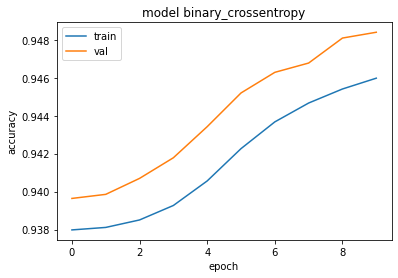

In [48]:
print(model.history.history.keys())
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model binary_crossentropy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
preds = model.predict(X_valid).reshape(-1)

In [50]:
print(classification_report(y_valid, (preds > 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     61365
           1       0.69      0.27      0.38      3942

    accuracy                           0.95     65307
   macro avg       0.82      0.63      0.68     65307
weighted avg       0.94      0.95      0.94     65307



График стал адекватнее, потому что валидация перестала падать, но некоторые метрики чуть-чуть ухудшились, что, возможно, связано с увеличением размера батча или добавлением некоторых новых параметров. Попробуем еще что-то сделать со сложением эмбедингов

In [0]:
inputs = tf.keras.layers.Input(shape=(MAX_LEN,))

embeddings = tf.keras.layers.Embedding(input_dim=len(word2id), output_dim=100, \
                                       embeddings_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01), \
                                       activity_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01))(inputs)
summ = tf.keras.layers.Lambda(lambda x: tf.keras.backend.sum(x,  axis=1))(embeddings)
dense = tf.keras.layers.Dense(100, activation='relu')(summ)
dense = tf.keras.layers.Dense(65, activation='relu')(summ)
dense = tf.keras.layers.Dense(20, activation='relu')(summ)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [57]:
%%time
model.fit(X_train, y_train, 
          validation_data=(X_valid, y_valid),
          batch_size=400, #размер батча побольше, чтобы модель побыстрее отработала
         epochs=10)

Epoch 1/10


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


3103/3103 [==============================] - 312s 101ms/step - loss: 33.2651 - accuracy: 0.9381 - val_loss: 0.4882 - val_accuracy: 0.9396
Epoch 2/10
3103/3103 [==============================] - 320s 103ms/step - loss: 0.4778 - accuracy: 0.9381 - val_loss: 0.4620 - val_accuracy: 0.9402
Epoch 3/10
3103/3103 [==============================] - 327s 106ms/step - loss: 0.4592 - accuracy: 0.9388 - val_loss: 0.4481 - val_accuracy: 0.9418
Epoch 4/10
3103/3103 [==============================] - 341s 110ms/step - loss: 0.4471 - accuracy: 0.9404 - val_loss: 0.4389 - val_accuracy: 0.9428
Epoch 5/10
3103/3103 [==============================] - 322s 104ms/step - loss: 0.4397 - accuracy: 0.9420 - val_loss: 0.4323 - val_accuracy: 0.9453
Epoch 6/10
3103/3103 [==============================] - 309s 100ms/step - loss: 0.4343 - accuracy: 0.9431 - val_loss: 0.4288 - val_accuracy: 0.9452
Epoch 7/10
3103/3103 [==============================] - 313s 101ms/step - loss: 0.4304 - accuracy: 0.9440 - val_loss: 0.42

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


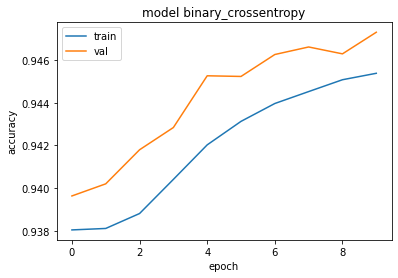

In [58]:
print(model.history.history.keys())
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model binary_crossentropy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
preds = model.predict(X_valid).reshape(-1)

In [60]:
print(classification_report(y_valid, (preds > 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     61365
           1       0.69      0.23      0.34      3942

    accuracy                           0.95     65307
   macro avg       0.82      0.61      0.66     65307
weighted avg       0.94      0.95      0.93     65307



Тут тоже с валидацией, кажется, стало получше, и она перестала падать. Очевидно, регуляризаторы помогают, но меня несколько смущает то, что валидация выше трейна и в том, и в другом случае.

## Задание 2.

In [0]:
import gensim
from gensim.models import FastText
from gensim.models import Word2Vec

In [0]:
texts = quora.question_text.apply(preprocess).tolist()

In [10]:
%%time
fasttext = FastText(texts, size=100, window=3, iter=2)
w2v = Word2Vec(texts, size=100, window=3, iter=2)

CPU times: user 6min 23s, sys: 2.01 s, total: 6min 25s
Wall time: 3min 41s


In [13]:
fasttext.most_similar('star')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('5-star', 0.9608129262924194),
 ('starc', 0.9255099892616272),
 ('stark', 0.9194779396057129),
 ('starr', 0.9088133573532104),
 ('rockstar', 0.9032350182533264),
 ('starcraft', 0.8889644742012024),
 ('onstar', 0.8889575004577637),
 ('starfire', 0.8888615369796753),
 ('stardom', 0.8874017000198364),
 ('stardew', 0.8848877549171448)]

In [23]:
w2v.most_similar('star')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('marvel', 0.7417364120483398),
 ('wars', 0.7352331280708313),
 ('clone', 0.7193706035614014),
 ('naruto', 0.7189288139343262),
 ('avengers', 0.712352991104126),
 ('mcu', 0.7099201083183289),
 ('trek', 0.7020530700683594),
 ('comics', 0.6889388561248779),
 ('superhero', 0.6751447916030884),
 ('episode', 0.666731595993042)]

In [27]:
weights_w2v = np.zeros((len(word2id), 100))

for word, i in word2id.items():
    if word == 'PAD':
        continue
    
    if word == 'UNK':
        weights_w2v[i] = fasttext['lsjfoigjhgweoirpwjgs']
    
    try:
        weights_w2v[i] = fasttext[word]
    
    
    except KeyError:
        weights_w2v[i] = fasttext['kfoeugnhsljif']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [26]:
weights_ft = np.zeros((len(word2id), 100))

for word, i in word2id.items():
    if word == 'PAD':
        continue
    
    if word == 'UNK':
        weights_ft[i] = fasttext['lsjfoigjhgweoirpwjgs']
    
    try:
        weights_ft[i] = fasttext[word]
    
    
    except KeyError:
        weights_ft[i] = fasttext['kfoeugnhsljif']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


Попробуем Average

In [0]:
inputs = tf.keras.layers.Input(shape=(MAX_LEN,))

embeddings_ft = tf.keras.layers.Embedding(input_dim=len(word2id), output_dim=100, trainable=False, weights=[weights_ft])(inputs)
embeddings_w2v = tf.keras.layers.Embedding(input_dim=len(word2id), output_dim=100, trainable=False, weights=[weights_w2v])(inputs)
embeddings = tf.keras.layers.Average()([embeddings_ft, embeddings_w2v])

mean = tf.keras.layers.Lambda(lambda x: tf.keras.backend.mean(x,  axis=1))(embeddings)
dense = tf.keras.layers.Dense(100, activation='relu')(mean)
dense = tf.keras.layers.Dense(100, activation='relu')(mean)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [37]:
%%time
model.fit(X_train, y_train, 
          validation_data=(X_valid, y_valid),
          batch_size=150,
         epochs=10)

Epoch 1/10
8273/8273 [==============================] - 75s 9ms/step - loss: 0.1927 - accuracy: 0.9395 - val_loss: 0.1487 - val_accuracy: 0.9457
Epoch 2/10
8273/8273 [==============================] - 81s 10ms/step - loss: 0.1493 - accuracy: 0.9445 - val_loss: 0.1433 - val_accuracy: 0.9468
Epoch 3/10
8273/8273 [==============================] - 71s 9ms/step - loss: 0.1457 - accuracy: 0.9452 - val_loss: 0.1410 - val_accuracy: 0.9474
Epoch 4/10
8273/8273 [==============================] - 64s 8ms/step - loss: 0.1437 - accuracy: 0.9457 - val_loss: 0.1391 - val_accuracy: 0.9477
Epoch 5/10
8273/8273 [==============================] - 66s 8ms/step - loss: 0.1423 - accuracy: 0.9460 - val_loss: 0.1386 - val_accuracy: 0.9482
Epoch 6/10
8273/8273 [==============================] - 61s 7ms/step - loss: 0.1412 - accuracy: 0.9463 - val_loss: 0.1371 - val_accuracy: 0.9484
Epoch 7/10
8273/8273 [==============================] - 62s 7ms/step - loss: 0.1403 - accuracy: 0.9465 - val_loss: 0.1363 - val_a

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


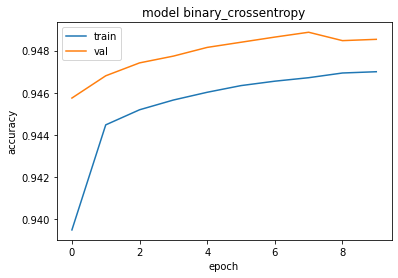

In [38]:
print(model.history.history.keys())
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model binary_crossentropy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
preds = model.predict(X_valid).reshape(-1)

In [40]:
print(classification_report(y_valid, (preds > 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     61365
           1       0.66      0.30      0.41      3942

    accuracy                           0.95     65307
   macro avg       0.81      0.65      0.69     65307
weighted avg       0.94      0.95      0.94     65307



Попробуем Concatenate

In [0]:
inputs = tf.keras.layers.Input(shape=(MAX_LEN,))

embeddings_ft = tf.keras.layers.Embedding(input_dim=len(word2id), output_dim=100, trainable=False, weights=[weights_ft])(inputs)
embeddings_w2v = tf.keras.layers.Embedding(input_dim=len(word2id), output_dim=100, trainable=False, weights=[weights_w2v])(inputs)
embeddings = tf.keras.layers.Concatenate()([embeddings_ft, embeddings_w2v])

mean = tf.keras.layers.Lambda(lambda x: tf.keras.backend.mean(x,  axis=1))(embeddings)
dense = tf.keras.layers.Dense(100, activation='relu')(mean)
dense = tf.keras.layers.Dense(100, activation='relu')(mean)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [42]:
%%time
model.fit(X_train, y_train, 
          validation_data=(X_valid, y_valid),
          batch_size=150,
         epochs=10)

Epoch 1/10
8273/8273 [==============================] - 104s 13ms/step - loss: 0.1757 - accuracy: 0.9425 - val_loss: 0.1439 - val_accuracy: 0.9468
Epoch 2/10
8273/8273 [==============================] - 104s 13ms/step - loss: 0.1454 - accuracy: 0.9453 - val_loss: 0.1399 - val_accuracy: 0.9477
Epoch 3/10
8273/8273 [==============================] - 105s 13ms/step - loss: 0.1426 - accuracy: 0.9461 - val_loss: 0.1383 - val_accuracy: 0.9479
Epoch 4/10
8273/8273 [==============================] - 108s 13ms/step - loss: 0.1409 - accuracy: 0.9465 - val_loss: 0.1366 - val_accuracy: 0.9484
Epoch 5/10
8273/8273 [==============================] - 105s 13ms/step - loss: 0.1396 - accuracy: 0.9469 - val_loss: 0.1354 - val_accuracy: 0.9488
Epoch 6/10
8273/8273 [==============================] - 110s 13ms/step - loss: 0.1385 - accuracy: 0.9471 - val_loss: 0.1348 - val_accuracy: 0.9489
Epoch 7/10
8273/8273 [==============================] - 107s 13ms/step - loss: 0.1376 - accuracy: 0.9473 - val_loss: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


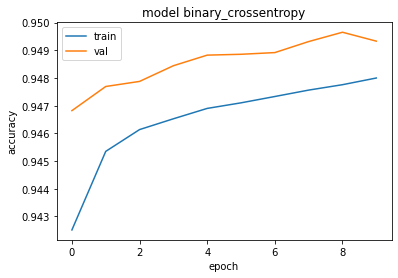

In [43]:
print(model.history.history.keys())
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model binary_crossentropy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
preds = model.predict(X_valid).reshape(-1)

In [45]:
print(classification_report(y_valid, (preds > 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     61365
           1       0.66      0.33      0.44      3942

    accuracy                           0.95     65307
   macro avg       0.81      0.66      0.71     65307
weighted avg       0.94      0.95      0.94     65307



Метрики и графики у Average и Concatenate очень похожи, немного, правда, непонятно, нормально ли то, что валидация полностью превосходит трейн. В целом метрики у такого способа получились похуже, чем у усреднения эмбедингов из предыдущего задания